<a href="https://colab.research.google.com/github/Javorai/Coding-Dojo-Core/blob/main/Clusterizaci%C3%B3n_M%C3%A9tricas_de_Agrupamiento_(K_means_y_DBSCAN)_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Métricas de Agrupamiento (K-means y DBSCAN) (Core)**
**Descripción:**

En esta actividad, se utilizarán los algoritmos K-means y DBSCAN para agrupar datos del dataset «Credit Card Data» disponible en Kaggle. El objetivo es aplicar ambas técnicas de clustering y compararlas utilizando métricas como el «silhouette score» y el «calinski-harabasz index» para evaluar la calidad de los clusters obtenidos.

Enlace al dataset: https://www.kaggle.com/arjunbhasin2013/ccdata

**Objetivo:**

El objetivo es comparar la efectividad de K-means y DBSCAN en el dataset seleccionado, evaluando la cohesión e intersección de los clusters obtenidos mediante métricas de evaluación. Se espera que los estudiantes comprendan las diferencias entre ambos algoritmos y cómo usar las métricas adecuadas para elegir el mejor modelo de clustering.

**Instrucciones:**

1. Carga de datos:

  – Descarga y carga el dataset «Credit Card Data» de Kaggle. Realiza una exploración inicial de las variables y observa cómo se distribuyen.

  – Este dataset incluye información sobre los comportamientos de clientes de tarjetas de crédito. Variables como el monto total de gastos, el número de compras y el saldo de la cuenta son de interés para el agrupamiento.

2. Exploración y preprocesamiento de datos:

  – Realiza una limpieza inicial de los datos, eliminando valores atípicos y manejando cualquier valor nulo presente en el dataset.

  – Estandariza las variables para asegurar que el rango de las características no afecte el rendimiento de los algoritmos de clustering.

  – Selecciona las características más relevantes para el análisis, como los montos de compras y la frecuencia de uso de la tarjeta.

3. Aplicación de K-means y DBSCAN:

  – Implementa primero el algoritmo K-means para agrupar los clientes. Determina el número óptimo de clusters utilizando el método del codo y calcula el «silhouette score» para evaluar la cohesión de los clusters formados.

  – Luego, aplica DBSCAN al mismo conjunto de datos. Experimenta con diferentes valores de epsilon y min_samples para obtener un clustering que capture tanto los clusters densos como los outliers.

4. Comparación mediante métricas:
  – Calcula y compara las siguientes métricas de evaluación para ambos algoritmos:

    – Silhouette Score: Esta métrica mide cuán similares son los puntos dentro del mismo cluster en comparación con los puntos de otros clusters.

    – Calinski-Harabasz Index: Esta métrica evalúa la dispersión entre los clusters y dentro de ellos, con mayores valores indicando una mejor definición de clusters.

  – Visualiza ambos agrupamientos utilizando gráficos de dispersión para comparar visualmente cómo K-means y DBSCAN dividen los datos.

5. Interpretación de resultados:

  – Discute cuál de los dos algoritmos ofrece un mejor rendimiento en este dataset basado en las métricas calculadas. ¿Los clusters formados por K-means son más cohesivos que los obtenidos con DBSCAN?

  – Analiza también los outliers detectados por DBSCAN. ¿Estos puntos tienen comportamientos inusuales en comparación con los clientes agrupados por K-means?

**Análisis de Resultados:**

 – En esta sección, evalúa los resultados de ambos algoritmos y discute cuál de ellos es más adecuado para este tipo de datos. Considera la forma de los clusters, la presencia de outliers y las métricas de evaluación para justificar tu elección.

  – Genera un reporte que incluya gráficas comparativas y explique por qué se prefirió un algoritmo sobre el otro. Discute también las limitaciones de cada uno en este caso.

**Conclusión:**

 – Esta actividad busca aplicar y comparar dos técnicas de clustering utilizando métricas estándar de evaluación. A través de esta comparación, se espera que los estudiantes entiendan las fortalezas y debilidades de K-means y DBSCAN, y cómo seleccionar el mejor modelo para diferentes tipos de datos.

Información del Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-n

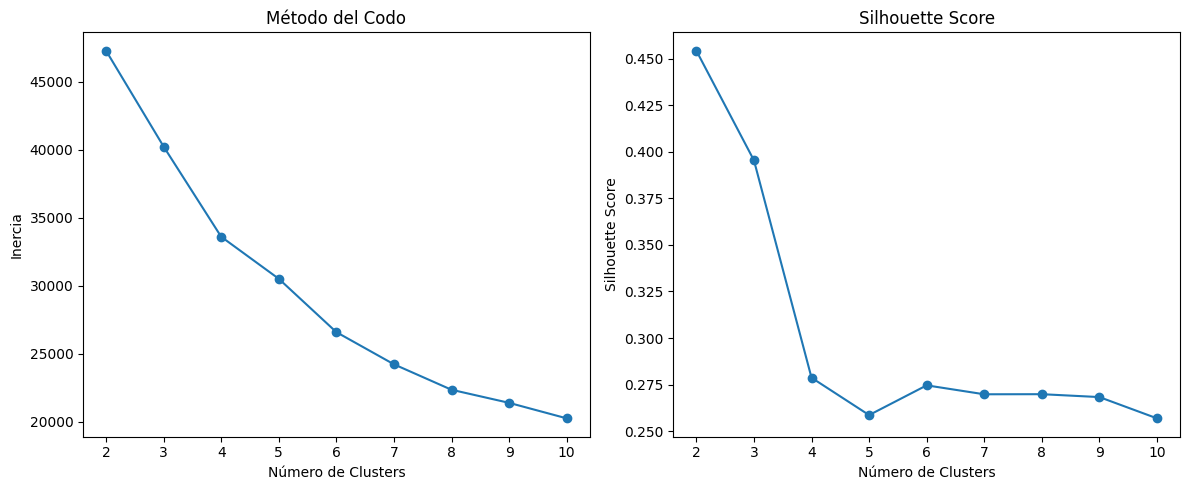

Resultados K-means:
Silhouette Score: 0.39535242290135514
Calinski-Harabasz Index: 2492.410983480457
Resultados DBSCAN:
Número de Clusters: 11
Número de Outliers: 2350
Silhouette Score (sin outliers): -0.007855857838579252
Calinski-Harabasz Index (sin outliers): 19.85675166624831


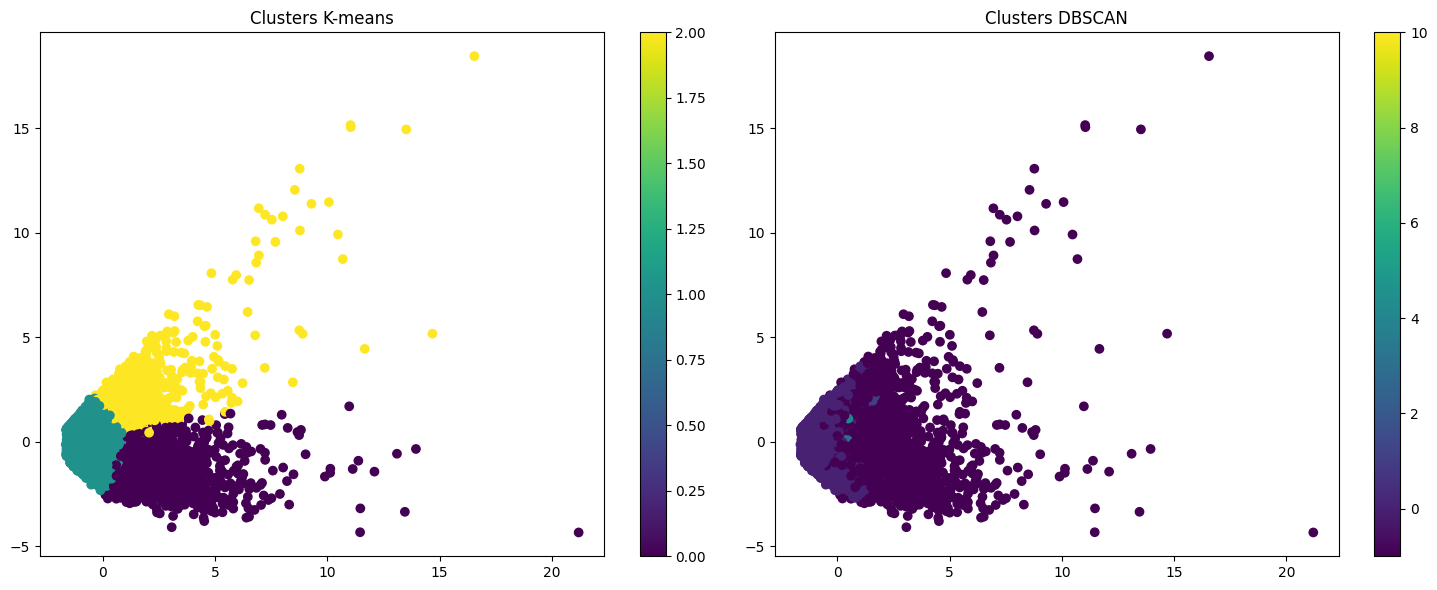

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.decomposition import PCA

# 1. Cargar y explorar los datos
def load_and_explore_data(file_path):
    """
    Cargar el dataset y realizar una exploración inicial
    """
    # Cargar datos
    URL = '/content/drive/MyDrive/Bootcamp Coding Dojo/DataScience/Tareas Core/Archivos CSV-Tareas/CC GENERAL.csv'
    df = pd.read_csv(URL)

    # Mostrar información básica
    print("Información del Dataset:")
    print(df.info())

    # Resumen estadístico
    print("\nResumen Estadístico:")
    print(df.describe())

    return df

# 2. Preprocesamiento de datos
def preprocess_data(df):
    """
    Preprocesar datos para clustering
    """
    # Seleccionar características relevantes
    features = [
        'BALANCE', 'PURCHASES', 'CASH_ADVANCE',
        'PURCHASES_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
        'CREDIT_LIMIT', 'PAYMENTS'
    ]

    # Crear DataFrame de características
    X = df[features].copy()

    # Manejar valores nulos (si los hubiera)
    X.fillna(X.mean(), inplace=True)

    # Estandarizar características
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    return X_scaled, features

# 3. Determinar número óptimo de clusters (método del codo)
def find_optimal_clusters(X, max_clusters=10):
    """
    Encontrar número óptimo de clusters usando método del codo
    """
    inertias = []
    silhouette_scores = []

    for k in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        inertias.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(X, kmeans.labels_))

    # Graficar método del codo
    plt.figure(figsize=(12,5))

    plt.subplot(1,2,1)
    plt.plot(range(2, max_clusters + 1), inertias, marker='o')
    plt.title('Método del Codo')
    plt.xlabel('Número de Clusters')
    plt.ylabel('Inercia')

    plt.subplot(1,2,2)
    plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
    plt.title('Silhouette Score')
    plt.xlabel('Número de Clusters')
    plt.ylabel('Silhouette Score')

    plt.tight_layout()
    plt.show()

# 4. Aplicar K-means y evaluar
def apply_kmeans(X, n_clusters=3):
    """
    Aplicar K-means y calcular métricas de evaluación
    """
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans_labels = kmeans.fit_predict(X)

    # Calcular métricas
    kmeans_silhouette = silhouette_score(X, kmeans_labels)
    kmeans_calinski = calinski_harabasz_score(X, kmeans_labels)

    print("Resultados K-means:")
    print(f"Silhouette Score: {kmeans_silhouette}")
    print(f"Calinski-Harabasz Index: {kmeans_calinski}")

    return kmeans_labels

# 5. Aplicar DBSCAN y evaluar
def apply_dbscan(X, eps=0.5, min_samples=5):
    """
    Aplicar DBSCAN y calcular métricas de evaluación
    """
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    dbscan_labels = dbscan.fit_predict(X)

    # Contar número de clusters y outliers
    n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
    n_outliers = list(dbscan_labels).count(-1)

    print("Resultados DBSCAN:")
    print(f"Número de Clusters: {n_clusters}")
    print(f"Número de Outliers: {n_outliers}")

    # Calcular métricas (excluyendo outliers)
    mask = dbscan_labels != -1
    if np.sum(mask) > 1:
        dbscan_silhouette = silhouette_score(X[mask], dbscan_labels[mask])
        dbscan_calinski = calinski_harabasz_score(X[mask], dbscan_labels[mask])

        print(f"Silhouette Score (sin outliers): {dbscan_silhouette}")
        print(f"Calinski-Harabasz Index (sin outliers): {dbscan_calinski}")

    return dbscan_labels

# 6. Visualización de clusters
def visualize_clusters(X, kmeans_labels, dbscan_labels):
    """
    Visualizar clusters usando PCA para reducción de dimensionalidad
    """
    # Reducción de dimensionalidad
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    # Preparar plots
    plt.figure(figsize=(15,6))

    # Plot K-means
    plt.subplot(1,2,1)
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis')
    plt.title('Clusters K-means')
    plt.colorbar(scatter)

    # Plot DBSCAN
    plt.subplot(1,2,2)
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap='viridis')
    plt.title('Clusters DBSCAN')
    plt.colorbar(scatter)

    plt.tight_layout()
    plt.show()

# Función principal para ejecutar todo el análisis
def main():
    # Cargar datos
    df = load_and_explore_data('CC GENERAL_mod.csv')

    # Preprocesar datos
    X_scaled, features = preprocess_data(df)

    # Encontrar número óptimo de clusters
    find_optimal_clusters(X_scaled)

    # Aplicar K-means
    kmeans_labels = apply_kmeans(X_scaled, n_clusters=3)

    # Aplicar DBSCAN
    dbscan_labels = apply_dbscan(X_scaled, eps=0.5, min_samples=5)

    # Visualizar clusters
    visualize_clusters(X_scaled, kmeans_labels, dbscan_labels)

# Ejecutar análisis
if __name__ == '__main__':
    main()

# **Evaluación de los Resultados de Ambos Algoritmos**
La imagen muestra dos gráficos de dispersión que comparan los resultados de dos algoritmos de clustering: K-means y DBSCAN.

**K-means**
* **Forma de los Clusters:** K-means tiende a formar clusters esféricos debido a su naturaleza basada en la minimización de la varianza dentro de los clusters. En el gráfico de la izquierda, se pueden observar tres clusters bien definidos, pero la forma de los clusters no se ajusta bien a la distribución de los datos.

* **Presencia de Outliers:** K-means no maneja bien los outliers. En el gráfico, algunos puntos alejados del centro de los clusters pueden estar mal asignados.

* **Métricas de Evaluación:** K-means utiliza la suma de las distancias cuadradas dentro de los clusters como métrica de evaluación. Sin embargo, esta métrica puede no ser adecuada para datos con formas de clusters no esféricas o con outliers.

**DBSCAN**
* **Forma de los Clusters:** DBSCAN es capaz de formar clusters de formas arbitrarias, lo que es evidente en el gráfico de la derecha. Los clusters formados por DBSCAN se ajustan mejor a la distribución de los datos.

* **Presencia de Outliers:** DBSCAN maneja bien los outliers, ya que los puntos que no pertenecen a ningún cluster se etiquetan como ruido (puntos morados dispersos en el gráfico).

* **Métricas de Evaluación:** DBSCAN utiliza la densidad de puntos para formar clusters, lo que permite identificar clusters de formas arbitrarias y manejar outliers de manera efectiva.

**Discusión de la Adecuación de Cada Algoritmo**
* **Adecuación de K-means:** K-means es adecuado para datos con clusters esféricos y sin muchos outliers. En este caso, los datos no parecen tener una forma esférica clara, lo que hace que K-means no sea la mejor opción.

* **Adecuación de DBSCAN:** DBSCAN es más adecuado para estos datos debido a su capacidad para formar clusters de formas arbitrarias y manejar outliers. Los datos en el gráfico parecen tener una distribución más compleja que se ajusta mejor a las capacidades de DBSCAN.

**Limitaciones de Cada Algoritmo**
* **Limitaciones de K-means:**

  * No maneja bien los outliers.

  * Asume que los clusters son esféricos.

  * Requiere especificar el número de clusters a priori.

* **Limitaciones de DBSCAN:**

  * Sensible a los parámetros de entrada (epsilon y el número mínimo de puntos).

  * Puede fallar en identificar clusters en datos con densidades muy variables.

En resumen, DBSCAN es más adecuado debido a su capacidad para manejar clusters de formas arbitrarias y outliers, mientras que K-means tiene limitaciones significativas en este contexto.